In [1]:
%matplotlib inline
import logging
import pyobsbox
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from dtaidistance import clustering
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
cp_dir = '../data_checkpoints/checkpoint7/'
logging.basicConfig(format='%(asctime)s-%(name)s-%(levelname)s: %(message)s', level=logging.INFO)
# path to preprocessed features, extracted from obsbox data:
feature_path = '/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/runs_lcoyle/B1H/'
load = True

In [3]:
obtraining = pyobsbox.OBTraining(feature_path, verbose=10)
obtraining.load_features_meta()

2019-08-08 09:41:43,487-pyobsbox.trainer-INFO: Loading features and metadata.
Loading files: 100%|██████████| 37/37 [01:26<00:00,  2.25s/it]


In [4]:
obtraining.df_features.head()

variable,x__cid_ce__normalize_False,x__cid_ce__normalize_True,"x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_2","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_20","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_5","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_1__w_2","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_1__w_20","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_1__w_5","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_2__w_2","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_2__w_20","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_2__w_5","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_3__w_2","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_3__w_20","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_3__w_5","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_4__w_2","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_4__w_20","x__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_4__w_5","x__fft_aggregated__aggtype_""centroid""","x__fft_aggregated__aggtype_""kurtosis""","x__fft_aggregated__aggtype_""skew""","x__fft_aggregated__aggtype_""variance""","x__fft_coefficient__coeff_1__attr_""abs""","x__fft_coefficient__coeff_2__attr_""abs""","x__fft_coefficient__coeff_3__attr_""abs""","x__fft_coefficient__coeff_4__attr_""abs""",x__maximum,x__mean,x__minimum,x__standard_deviation
0,4.229078,5.241085,0.038449,1.121973,0.150662,10.970790,4.918783,7.645829,14.935159,8.684074,14.259089,11.824575,12.389774,19.283645,6.448406,16.008537,22.305256,102.633114,30.728860,5.121645,168284.120396,483.217360,288.231118,529.349621,1326.605196,19.617882,17.131118,15.083780,0.806909
1,3.749646,4.259285,0.011781,0.583254,0.051292,9.464498,3.878651,6.533496,12.897692,7.148482,12.256670,10.215521,10.368426,16.609228,5.572903,13.514777,19.232209,96.389306,32.887684,5.314433,160292.231920,1131.452748,1514.101127,1320.927358,665.217619,17.648906,14.977914,13.105491,0.880346
2,3.841415,5.136053,0.042878,1.347184,0.170340,9.624430,4.677652,6.739772,13.096969,7.979741,12.534851,10.368023,11.228844,16.936267,5.653998,14.400993,19.581248,98.800885,31.809281,5.219536,162809.548915,894.653304,911.359138,593.796313,896.293428,17.193712,15.279290,13.670289,0.747931
3,4.071226,5.644710,-0.065173,-1.738566,-0.253132,8.478486,1.247188,5.606375,11.599135,4.215954,10.791861,9.198971,7.145689,14.749135,5.021916,10.014860,17.151204,99.972485,31.489456,5.193609,166104.583259,826.186012,1271.134112,1172.926907,466.922400,17.914327,16.115350,14.200909,0.721246
4,3.962795,4.733851,0.131634,3.572838,0.511099,10.878640,7.282683,7.876678,14.753477,10.954036,14.360280,11.665049,14.559418,19.268913,6.355716,18.072119,22.198598,98.066330,32.150770,5.249663,160919.572887,830.730459,401.601048,981.720202,663.114418,19.286693,15.620749,12.878802,0.837119


In [5]:
obtraining.df_meta.head()

,beam,bunch_num,filename,fill_number,n_bunches,plane,time
0,B1,1,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7431/...,7431,12,H,20181109 17h43m43s
1,B1,2,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7431/...,7431,12,H,20181109 17h43m43s
2,B1,3,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7431/...,7431,12,H,20181109 17h43m43s
3,B1,4,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7431/...,7431,12,H,20181109 17h43m43s
4,B1,5,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7431/...,7431,12,H,20181109 17h43m43s


In [6]:
print(obtraining.df_features.shape)
print(obtraining.df_meta.shape)

(11574170, 29)
(11574170, 7)


The features are extracted for each bunch. The meta DataFrame is used to keep track of which row of df_features goes to which file/bunch number.

In [7]:
if not load:
    # this usually takes a bit of time
    obtraining.run_pca()
    params = params={'behaviour': "new",
                     'n_estimators': 100, # this should be higher
                     'max_samples': "auto",
                     'contamination': 0.001,  # <-- most important param
                     'bootstrap': False,
                     'n_jobs': -1,
                     'verbose': True}
    obtraining.train_iforest(params=params)
    obtraining.predict_labels()
    obtraining.save_checkpoint('../data_checkpoints/checkpoint7/')
else:
    obtraining.load_checkpoint(cp_dir)

2019-08-08 09:47:16,866-pyobsbox.trainer-INFO: Loading checkpoint from ../data_checkpoints/checkpoint7/.


Loading from a checkpoint instead.

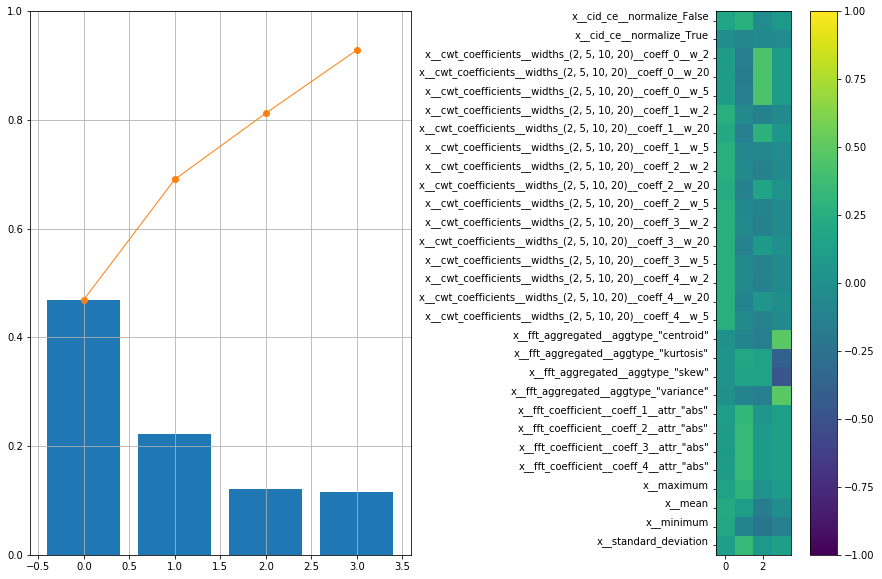

In [8]:
fig, ax = pyobsbox.utils.plot_pca(obtraining.pca, labels=obtraining.pca._X_columns)

2019-08-08 09:48:48,654-pyobsbox.trainer-INFO: Plotting pca data plot.


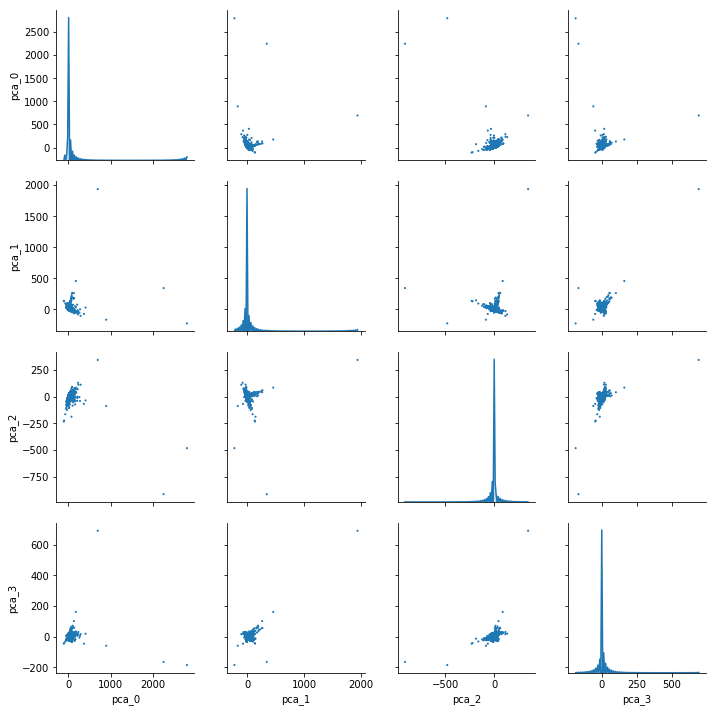

In [9]:
g = obtraining.plot_pca_data(n_points=1e6, labels=False, 
                             plot_kws={'edgecolor':'none', 'size':4}, seed=42)

2019-08-08 09:56:03,401-pyobsbox.trainer-INFO: Plotting pca data plot.


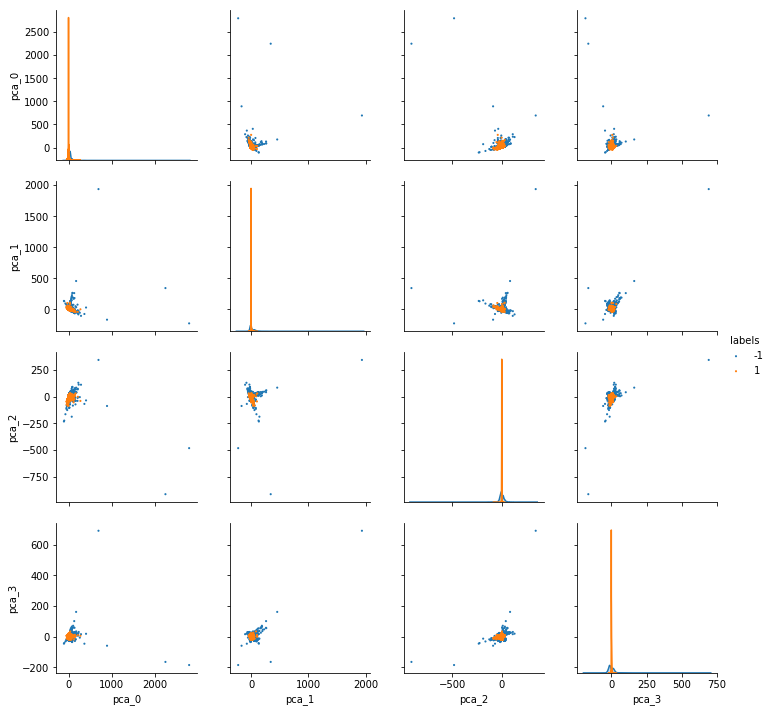

In [10]:
g = obtraining.plot_pca_data(n_points=1e6, labels=True, enflate_outliers=False,
                             plot_kws={'edgecolor':'none', 'size':4}, seed=42)

Proof of concept, need to see what happens when I use many more extracted features, does the PCA space distribution look better ?

# Plotting Unstable data

2019-08-08 10:05:32,003-pyobsbox.trainer-INFO: Plotting ObsBox data.
2019-08-08 10:06:10,436-pyobsbox.trainer-INFO: Loading file: 07480_Inst_B1H_Q7_20181127_22h24m23s.h5
2019-08-08 10:06:39,788-pyobsbox.trainer-INFO: Loading file: 07392_Inst_B1H_Q7_20181030_20h21m10s.h5
2019-08-08 10:07:08,464-pyobsbox.trainer-INFO: Loading file: 06998_Inst_B1H_Q7_20180730_12h38m48s.h5
2019-08-08 10:07:35,625-pyobsbox.trainer-INFO: Loading file: 06534_Inst_B1H_Q7_20180410_04h26m25s.h5
2019-08-08 10:08:03,841-pyobsbox.trainer-INFO: Loading file: 06890_Inst_B1H_Q7_20180705_13h21m04s.h5
/afs/cern.ch/work/l/lcoyle/public/adtobsbox/.venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


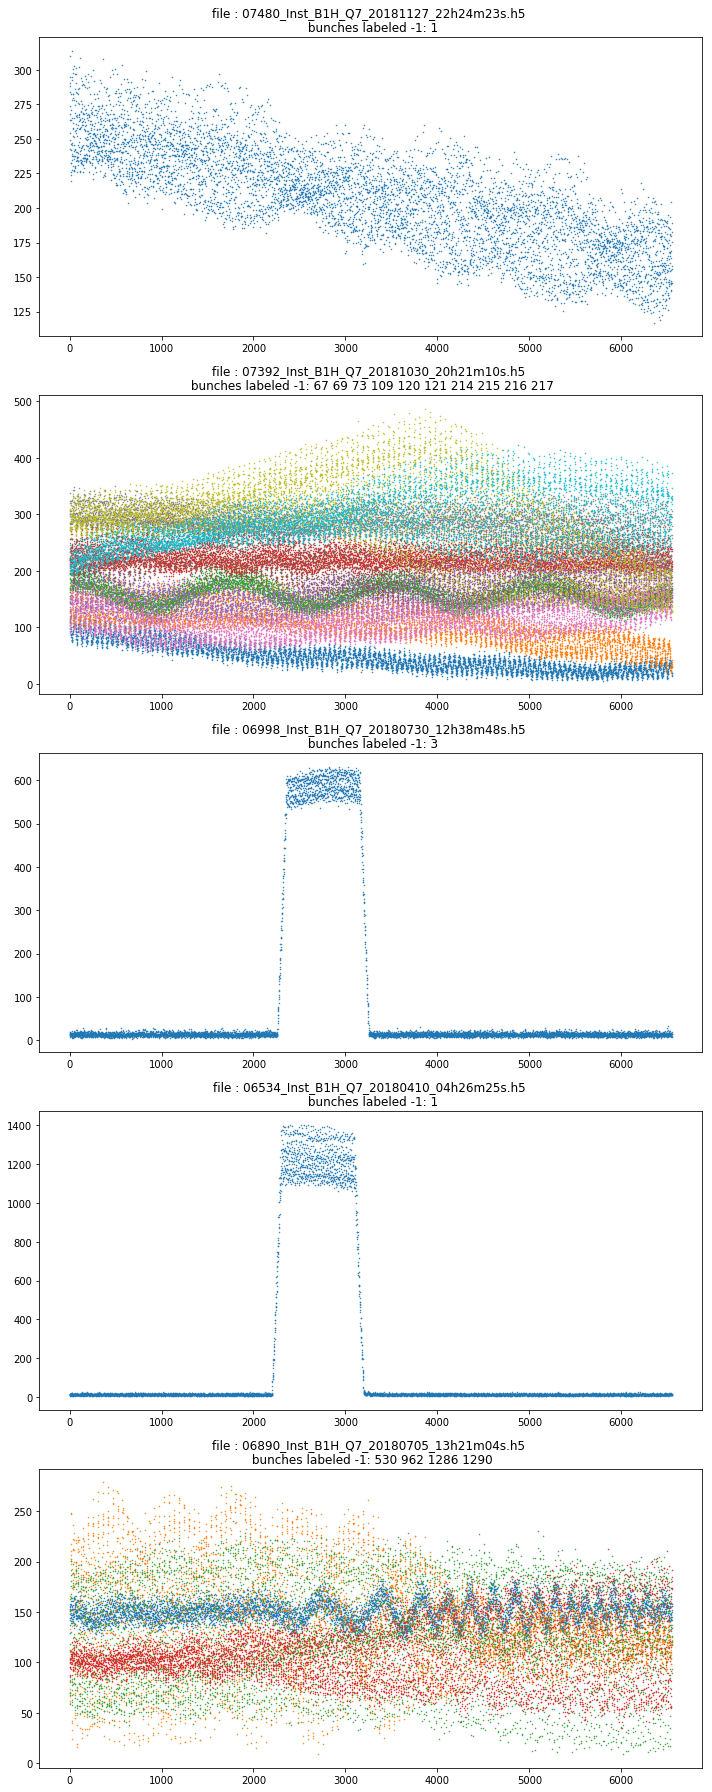

In [11]:
fig, ax = obtraining.plot_label(label_cond=-1,
                                style='scatter',
                                subsample_files=5,
                                subsample_bunches=None,
                                subsample_points=1,
                                parse_fun=None,
                                parse_kwargs={'filter':'rolling',
                                              'window':10,
                                              'subsample':10},
                                znorm=False,
                                seed=43,
                                markersize=1,
                                marker='.',
                                linewidth=0,
                               )

2019-08-08 10:08:06,439-pyobsbox.trainer-INFO: Plotting ObsBox data.
2019-08-08 10:08:38,403-pyobsbox.trainer-INFO: Loading file: 07480_Inst_B1H_Q7_20181127_22h24m23s.h5
2019-08-08 10:09:07,113-pyobsbox.trainer-INFO: Loading file: 07392_Inst_B1H_Q7_20181030_20h21m10s.h5
2019-08-08 10:09:34,460-pyobsbox.trainer-INFO: Loading file: 06998_Inst_B1H_Q7_20180730_12h38m48s.h5
2019-08-08 10:10:02,490-pyobsbox.trainer-INFO: Loading file: 06534_Inst_B1H_Q7_20180410_04h26m25s.h5
2019-08-08 10:10:32,312-pyobsbox.trainer-INFO: Loading file: 06890_Inst_B1H_Q7_20180705_13h21m04s.h5
/afs/cern.ch/work/l/lcoyle/public/adtobsbox/.venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


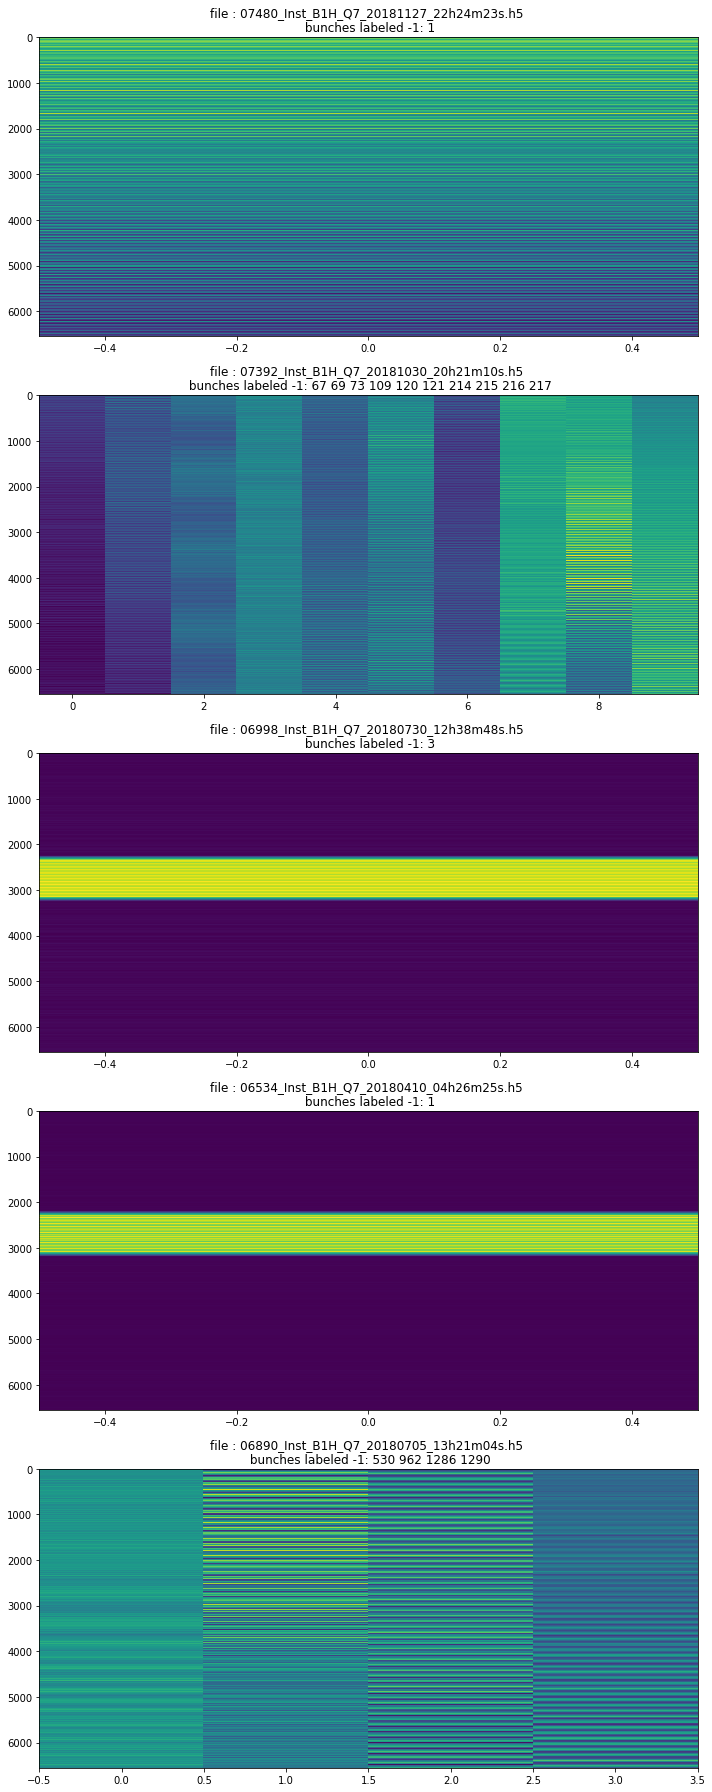

In [12]:
fig, ax = obtraining.plot_label(label_cond=-1,
                                style='imshow',
                                subsample_files=5,
                                subsample_bunches=None,
                                subsample_points=1,
                                parse_fun=None,
                                parse_kwargs={'filter':'rolling',
                                              'window':10,
                                              'subsample':10},
                                znorm=False,
                                seed=43,
#                                 markersize=1,
#                                 marker='.',
#                                 linewidth=0,
                               )

# Plotting Stable data

2019-08-08 10:10:34,448-pyobsbox.trainer-INFO: Plotting ObsBox data.
2019-08-08 10:11:10,657-pyobsbox.trainer-INFO: Loading file: 06965_Inst_B1H_Q7_20180723_22h07m21s.h5
2019-08-08 10:11:40,222-pyobsbox.trainer-INFO: Loading file: 06765_Inst_B1H_Q7_20180607_13h49m00s.h5
2019-08-08 10:12:13,653-pyobsbox.trainer-INFO: Loading file: 07167_Inst_B1H_Q7_20180913_18h10m14s.h5
2019-08-08 10:12:41,938-pyobsbox.trainer-INFO: Loading file: 06992_Inst_B1H_Q7_20180727_15h02m14s.h5
2019-08-08 10:13:08,813-pyobsbox.trainer-INFO: Loading file: 07362_Inst_B1H_Q7_20181026_15h34m38s.h5
/afs/cern.ch/work/l/lcoyle/public/adtobsbox/.venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


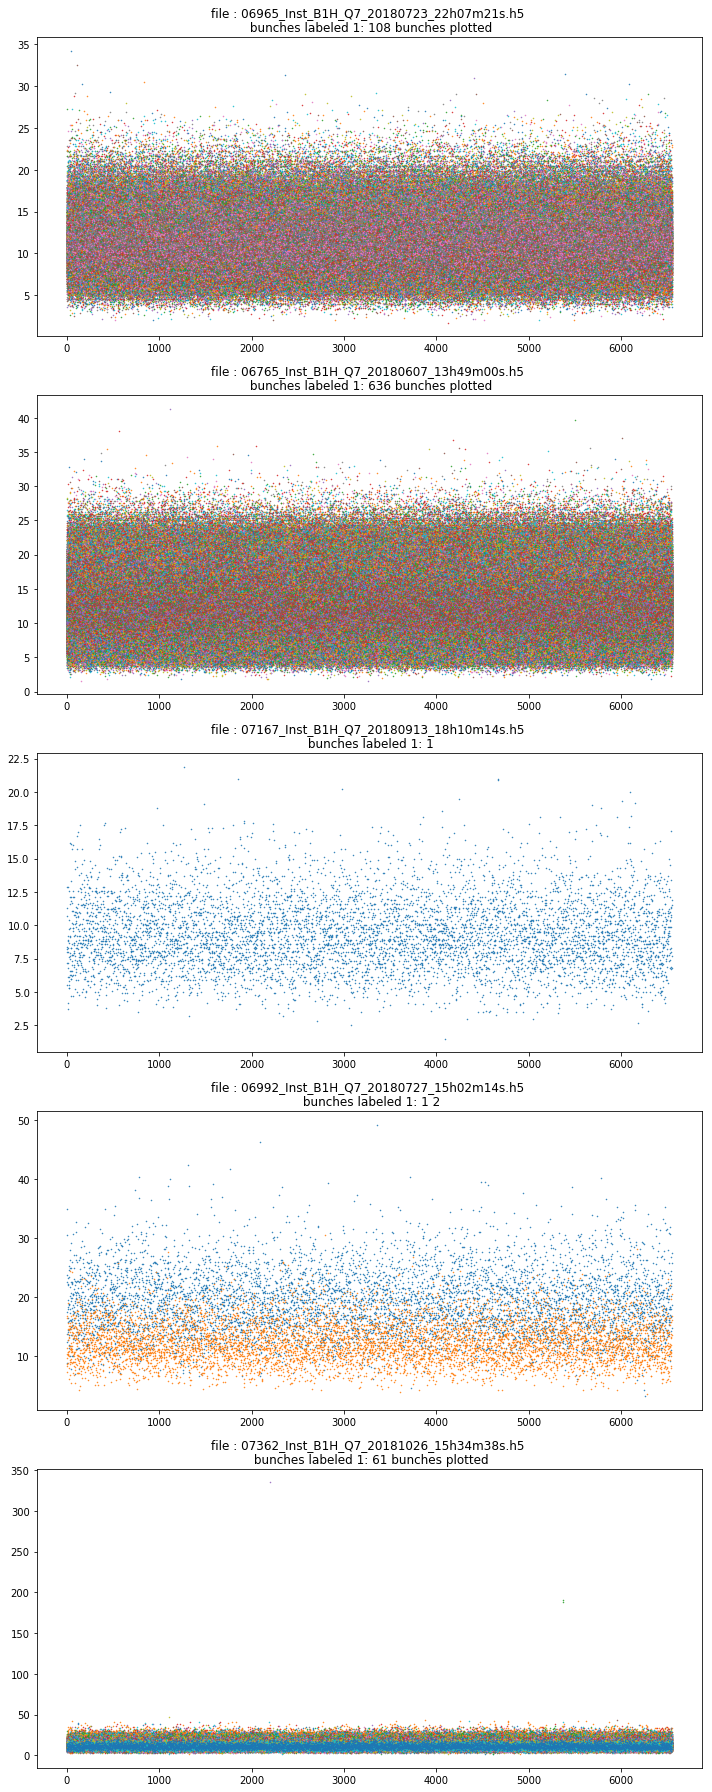

In [13]:
fig, ax = obtraining.plot_label(label_cond=1,
                                style='scatter',
                                subsample_files=5,
                                subsample_bunches=None,
                                subsample_points=1,
                                parse_fun=None,
                                parse_kwargs={'filter':'rolling',
                                              'window':10,
                                              'subsample':10},
                                znorm=False,
                                seed=43,
                                markersize=1,
                                marker='.',
                                linewidth=0)

# Trying out some timeseries cluster techniques on files

In [14]:
load_2 = True

In [15]:
if not load_2:
#     obtraining.load_single_unstable(n_jobs=20)
    obtraining.load_unstable(n_jobs=20)
    # data preparation for time series distance metric calculation
    obtraining.prep_data(filter='rolling', subsample=10, window=10)
    obtraining.calc_dists(method='fastdtw')
    obtraining.save_checkpoint(cp_dir)
else:
    obtraining.load_checkpoint(cp_dir)

2019-08-08 10:13:21,585-pyobsbox.trainer-INFO: Loading checkpoint from ../data_checkpoints/checkpoint7/.


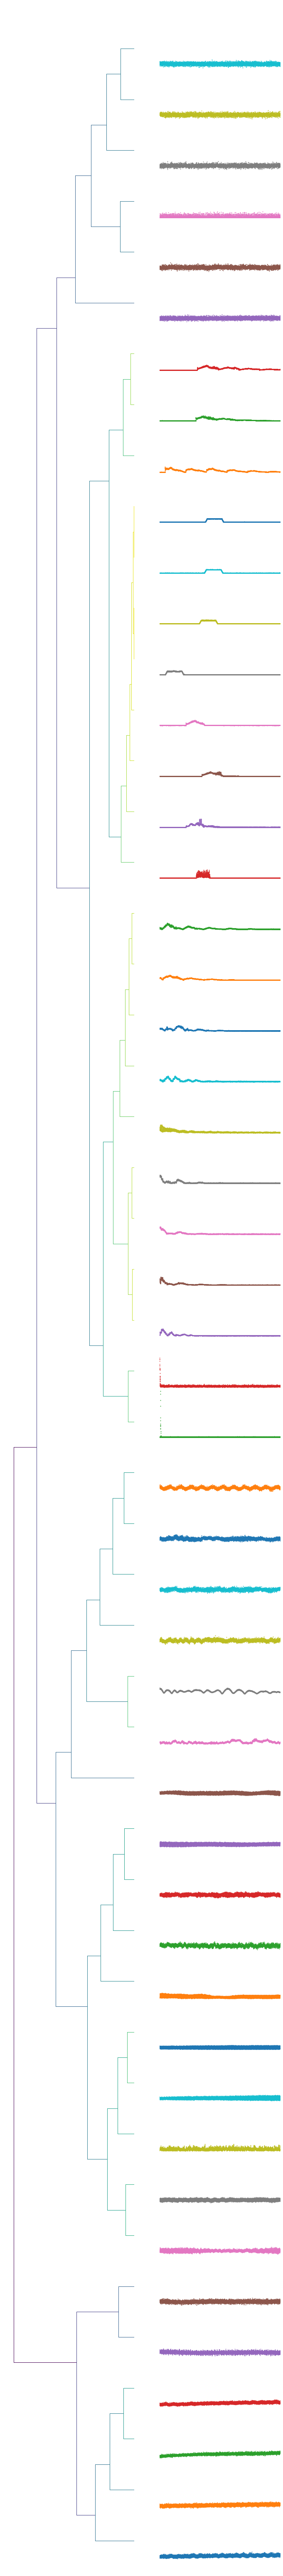

In [16]:
# subsample for plotting
subsample = 50
chosen = np.random.choice(np.arange(obtraining.ts_data.shape[1]),
                          subsample,
                          replace=False)

tree_model = clustering.LinkageTree(dists_fun=None)
tree_model.fit(np.matrix(obtraining.ts_data.T[chosen, :]), dists=obtraining.dists[chosen, :][:, chosen])
fig, ax = tree_model.plot(linewidth=0, marker='.', markersize=2)
fig.tight_layout()
fig.set_size_inches(10, 100)